# Table of Contents 
### 1 Import Libraries 
### 2 Import data set
### 3 Relationships to explore 
    Hypothesis
### 4 Cleaning data
    Missing values, duplicate check, extreme values check
### 5 Prepare data for regression analysis 
    - Scatterplot
    - Independent and dependent variables 
    - Split the data
### 6 Regression Analysis   
    - Fit the model to the training set 
    - Create a prediction for y on the test set 
    - Create a plot that shows the regression line on the test set 
    - Model performance statistics 
    - Compare the predicted y values with the actual y values 

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# 2 Import ARWU data set

In [2]:
#Path 
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

In [3]:
#Data set 
ARWU = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ARWU_rename_countries.pkl'))

In [4]:
#Check data set columns 
ARWU.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country,region,Score Category
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America,North America,Over 65
1,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,2006,United States of America,North America,Over 65
2,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,2007,United States of America,North America,Over 65
3,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,2008,United States of America,North America,Over 65
4,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,2009,United States of America,North America,Over 65


In [5]:
#Check shape
ARWU.shape

(3014, 14)

# 3 Relationships to Explore

I chose to use the pcp (per capita performance) variable to explore because both the world_rank and total_score variables have either values with dashes "-" or significant missing data (> 5%). The per capita performance variable does not have any missing values and  it is a score that takes into account the five indicators (alumni, award, hici, ns, and pub) with respect to the number of staff at the university. The relationships to explore include: 
- Per capita performance and the ns variable (the number of published papers in the Nature and Science journal (2017 to 2021). The ns and pub variables are indicators of research output. 
- Per capita performance and the hici variable (the number of highly cited researches). The hici and award variables are indicators of quality of faculty. 
- Per capita performance and the alumni  variable (the number of alumni winning prizes and awards). The alumni variable is an indicator of quality of education. 

The research output is composed of the ns and pub variables.

### Hypothesis 
The higher the research output by a university, the higher the per capita performance.

# 4 Cleaning Data 

#### Missing values check

In [6]:
#Create a subset of variables of interest: pcp, ns, hici, and alumni
columns = ["pcp","ns","hici","alumni", "award"]

In [7]:
#subset 
ARWU_sub = ARWU[columns]

In [8]:
ARWU_sub.head()

,pcp,ns,hici,alumni,award
0,72.4,100.0,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0,100.0


In [9]:
#check for missing values 
ARWU_sub.isnull().sum()

pcp        1
ns        12
hici       1
alumni     0
award      1
dtype: int64

In [10]:
#Look at the missing values 
ARWU_null = ARWU_sub[ARWU_sub['pcp'].isnull()==True]
ARWU_null

,pcp,ns,hici,alumni,award
1707,NaN,NaN,NaN,9.0,NaN


In [11]:
#Drop index 1707 because majority of the data is missing 
ARWU_sub = ARWU_sub.drop(1707)
ARWU_sub

,pcp,ns,hici,alumni,award
0,72.4,100.0,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0,100.0
...,...,...,...,...,...
3009,32.2,0.0,0.0,0.0,0.0
3010,18.5,3.3,0.0,0.0,0.0
3011,15.3,0.0,3.6,15.4,0.0
3012,17.5,4.2,7.2,0.0,0.0


In [12]:
#Look at missing values for ns variable 
ARWU_null = ARWU_sub[ARWU_sub['ns'].isnull()==True]
ARWU_null

,pcp,ns,hici,alumni,award
1440,16.2,NaN,15.7,19.8,0.0
1441,28.6,NaN,15.4,19.1,0.0
1442,28.4,NaN,16.6,18.6,0.0
1443,17.2,NaN,16.3,17.7,0.0
1444,28.5,NaN,14.5,17.3,0.0
1445,24.8,NaN,16.1,16.9,0.0
1446,25.9,NaN,16.1,22.8,16.2
1448,28.0,NaN,15.2,20.4,16.3
1449,28.7,NaN,15.2,19.9,16.3
2941,18.9,NaN,0.0,0.0,0.0


In [13]:
#Look at descriptive stats to determine how to impute for null values
ARWU_sub.describe()

,pcp,ns,hici,alumni,award
count,3013.000000,3002.000000,3013.000000,3013.000000,3013.000000
mean,21.597677,16.357495,16.623697,9.347262,7.789180
std,9.861345,13.206126,15.330460,14.923856,16.862552
min,8.700000,0.000000,0.000000,0.000000,0.000000
25%,15.800000,8.000000,7.300000,0.000000,0.000000
50%,19.200000,12.800000,12.600000,0.000000,0.000000
75%,24.800000,20.400000,21.900000,15.600000,11.200000
max,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='ns', ylabel='Count'>

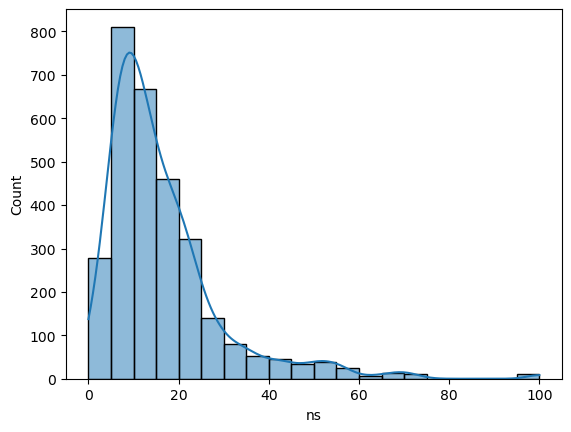

In [14]:
#Check ns histogram 
sns.histplot(ARWU_sub['ns'],bins=20,kde=True)

### I will impute the median of the ns variable for the missing values in the ARWU_sub subset data frame. The data for the ns variable is skewed to the right, making the median a better value to describe the data set than the mean. 

In [15]:
#Impute the median into the null values for the ns variable 
#data['Bare Nuclei'] = data['Bare Nuclei'].fillna((data['Bare Nuclei'].median()))
ARWU_sub = ARWU_sub['ns'].fillna((ARWU_sub['ns'].median()))

In [16]:
ARWU_sub.head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: ns, dtype: float64

In [20]:
#Re-create the subset data frame
columns = ["pcp","ns","hici","alumni", "award", "pub"]

In [21]:
ARWU_sub = ARWU[columns]

In [22]:
ARWU_sub.head()

,pcp,ns,hici,alumni,award,pub
0,72.4,100.0,100.0,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0,100.0,100.0


In [23]:
#Re-clean columns
ARWU_sub.isnull().sum()

pcp        1
ns        12
hici       1
alumni     0
award      1
pub        1
dtype: int64

In [24]:
#Look at the missing values 
ARWU_null = ARWU_sub[ARWU_sub['pcp'].isnull()==True]
ARWU_null

,pcp,ns,hici,alumni,award,pub
1707,NaN,NaN,NaN,9.0,NaN,NaN


In [25]:
#Drop index 1707 because majority of the data is missing 
ARWU_sub = ARWU_sub.drop(1707)
ARWU_sub

,pcp,ns,hici,alumni,award,pub
0,72.4,100.0,100.0,100.0,100.0,100.0
1,73.6,100.0,100.0,100.0,100.0,100.0
2,73.0,100.0,100.0,100.0,100.0,100.0
3,74.1,100.0,100.0,100.0,100.0,100.0
4,74.8,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
3009,32.2,0.0,0.0,0.0,0.0,36.0
3010,18.5,3.3,0.0,0.0,0.0,34.6
3011,15.3,0.0,3.6,15.4,0.0,29.1
3012,17.5,4.2,7.2,0.0,0.0,31.7


In [26]:
#Re-clean columns
ARWU_sub.isnull().sum()

pcp        0
ns        11
hici       0
alumni     0
award      0
pub        0
dtype: int64

In [27]:
#find the median of the ns variable 
#print(data['x1'].median()) 
print(ARWU_sub['ns'].median())

12.8


In [28]:
#Impute the median into the missing values for the ns variable 
ARWU_sub['ns'].fillna(12.8, inplace=True)
ARWU_sub.isnull().sum()

pcp       0
ns        0
hici      0
alumni    0
award     0
pub       0
dtype: int64

#### Duplicate values

In [29]:
dups = ARWU_sub.duplicated()

In [30]:
dups.shape #There are no full duplicates in the subset dataframe

(3013,)

#### Check for extreme values 

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcp', ylabel='Density'>

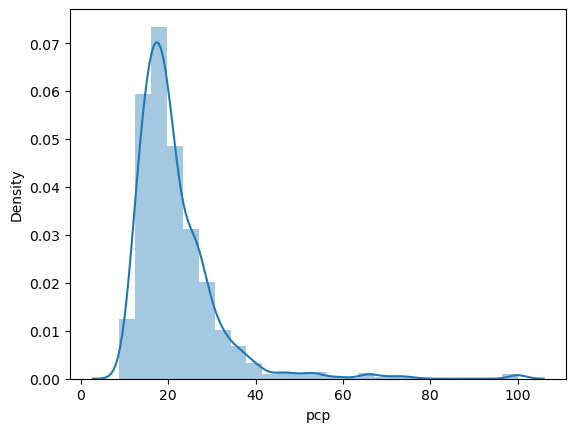

In [31]:
#Check for extreme values for the pcp variable 
sns.distplot(ARWU_sub['pcp'],bins=25)

The values over ~50 may be considered extreme (i.e. outliers) for the pcp variable, however I will wait to remove these.

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ns', ylabel='Density'>

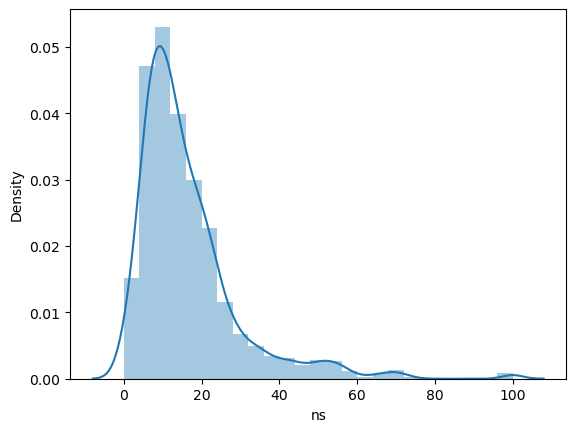

In [87]:
#Check for extreme values for the ns variable 
sns.distplot(ARWU_sub['ns'],bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hici', ylabel='Density'>

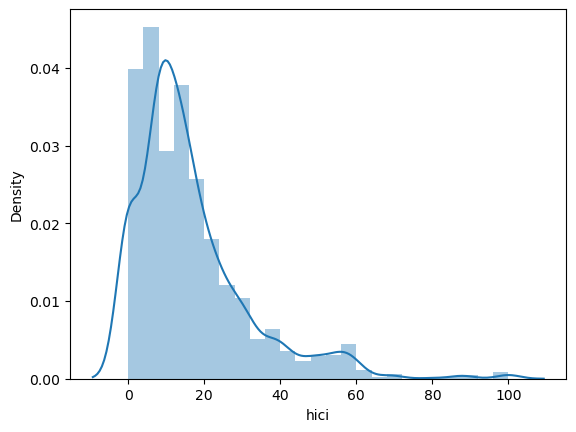

In [30]:
#Check for extreme values for the hici variable 
sns.distplot(ARWU_sub['hici'],bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alumni', ylabel='Density'>

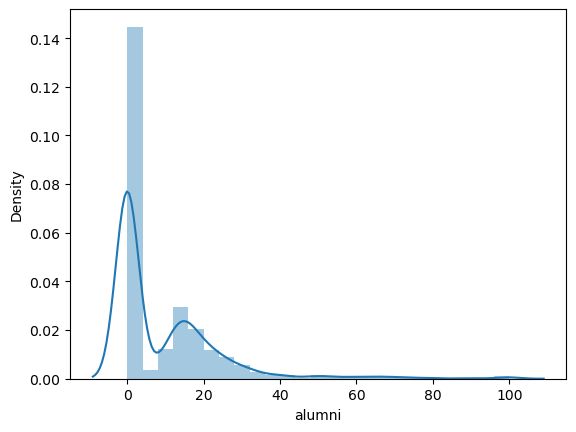

In [31]:
#Check for extreme values for the alumni variable 
sns.distplot(ARWU_sub['alumni'],bins=25)

The ns and hici variables have similar density plots as the pcp variable (there may be outliers but I will not remove them until I do a regression analysis). The alumni variable does seem to have a lot of values around 0. If I choose to use this variable for the regression analysis I will look into these potential extreme values. 

# 5 Prepare data for regression analysis
I will be doing the regression analysis for the pcp and ns variables first. I will explore the other variables in another Jupyter notebook. 

### Scatterplot

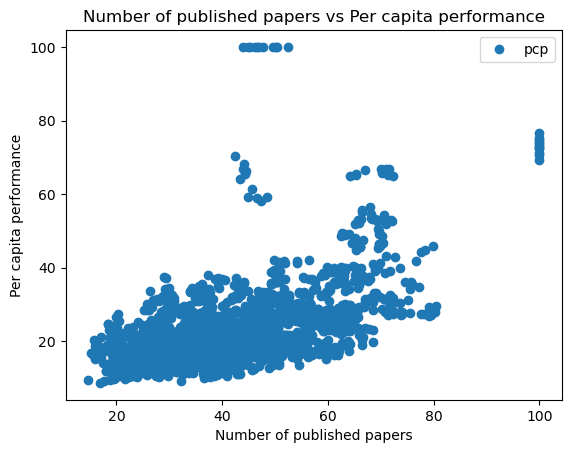

In [32]:
#Using matplotlib to create a sccatterplot for the pcp and pub variables 
ARWU_sub.plot(x='pub',y='pcp',style='o')
plt.title('Number of published papers vs Per capita performance')
plt.xlabel('Number of published papers')
plt.ylabel('Per capita performance')
plt.show()

In [33]:
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_sub['pub'].values.reshape(-1,1)

#y = dependent 
y = ARWU_sub['pcp'].values.reshape(-1,1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [35]:
#Create a regression object 
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predicted = regression.predict(X_test)

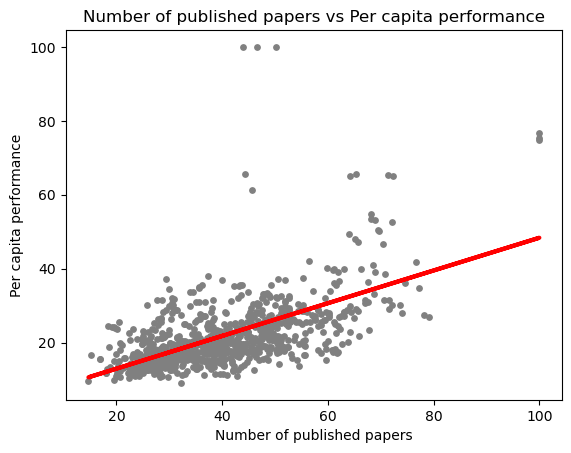

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of published papers vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of published papers')
plot_test.show()

In [39]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.44262289]]
Mean squared error 61.89715502307718
R2 score 0.3221519385476177


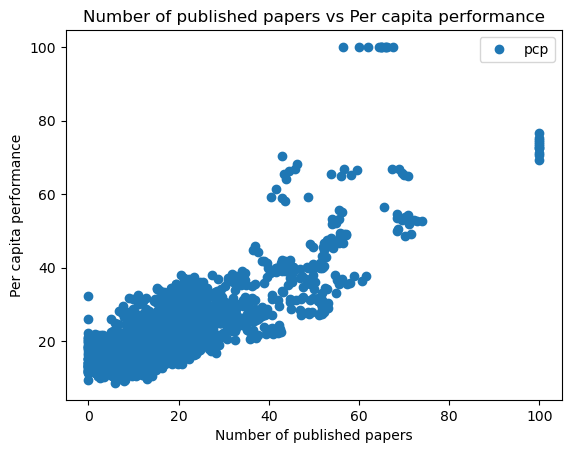

In [32]:
#Using matplotlib to create a sccatterplot for the pcp and ns variables 
ARWU_sub.plot(x='ns',y='pcp',style='o')
plt.title('Number of published papers vs Per capita performance')
plt.xlabel('Number of published papers')
plt.ylabel('Per capita performance')
plt.show()

The general trend is upward and to the right. Majority of the data points seem to be clustered in between a per capita performance of 40 and 40 published papers. 

### Prepare the independent and dependent variables 

In [33]:
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_sub['ns'].values.reshape(-1,1)

#y = dependent 
y = ARWU_sub['pcp'].values.reshape(-1,1)

In [34]:
#Check the independent variable X
X

array([[100. ],
       [100. ],
       [100. ],
       ...,
       [  0. ],
       [  4.2],
       [  7.5]])

In [35]:
#Check the dependent variable Y
y

array([[72.4],
       [73.6],
       [73. ],
       ...,
       [15.3],
       [17.5],
       [11.3]])

### Split the data into a training set and test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 6 Regression Analysis

In [37]:
#Create a regression object 
regression = LinearRegression()

### Fit the model to the training set

In [38]:
regression.fit(X_train, y_train)

LinearRegression()

### Create a prediction for y on the test set

In [39]:
y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line on the test set.

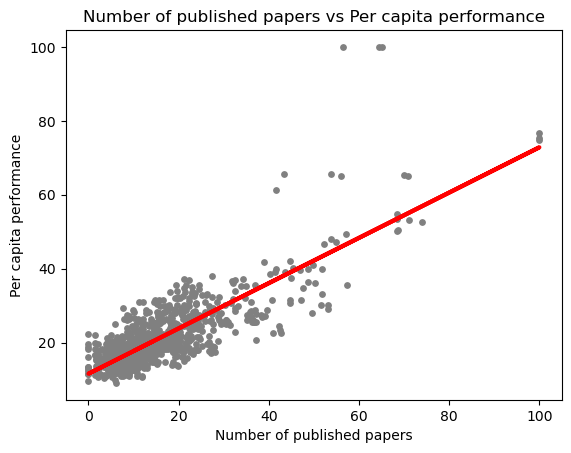

In [40]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of published papers vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of published papers')
plot_test.show()

### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
    The data values for the pcp and ns variables appear to follow a positive linear trend. Majority of the data is in the bottom left corner of the plot. There are some outliers above the regression line, for example at a per capita performance of 100). Overall I think the data has a moderate fit on the regression line. 

### Model performance statistics

In [41]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [42]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.61257428]]
Mean squared error 31.795097149319567
R2 score 0.6518055642731707


### Interpretation of the model performance statistics
Slope (how the y variable changes when X changes)
- Positive slope of 0.61 indicates a positive relationship 
- As the X increases, y will also increase 
- As the number of published papers in the Nature and Science journal increases, the per capita performance will also increase. 

Mean squared error (how close a regression line is to a set of points - accuracy)
- MSE value of 31.79
- The pcp values have a range (min/max) of 8.7 to 100 and the ns values have a range of 0 to 100.
- Based o the scale of the data, this is a large MSE value. 
- Since the MSE value is large this means that the distance of the data points from the regression line is far. Therefore the regression line is not an accurate representation of the data. 

R2 score (how well the model explains the variance in the data)
- R2 score of 0.65 (or 65%)
- The R2 score indicates that regression line is a moderate fit (closer to 1). 
- 65% of the variance in the pcp values can be explained by the number of published papers in the Nature and Science journal. 

### Compare the predicted y values with the actual y values in a dataframe

In [43]:
#Create a dataframe comparing the real and predicted values of y 
data_compare = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,14.9,20.041267
1,11.0,17.100910
2,14.6,16.917138
3,20.1,18.632346
4,12.9,18.203544
5,21.5,21.327673
6,19.7,22.920366
7,13.1,15.263187
8,36.2,31.190119
9,39.7,40.317475


### Some of the predicted values seem close/accurate to the actual. For example, if we look at indices 26, 18, and 9. However, overall there is a difference between the actual and predicted values for this model. I still think this model did a moderate (or "okay") job at predicting the values based on the R2 score.

    Impacts of possible data bias: I did have to impute a few values that were missing data and the value that I chose to impute (the median) may have not been the best choice. I could remove those rows because the missing values make up less than 5% of the data and try to re run the regression analysis. 
Further steps: 
   1. Remove the null values from the ns variable instead of imputing the median and rerun the regression analysis 
   2. Consider including the pub variable (research output) for the regression analysis -- maybe creating a combined research output column? 
   3. Run a regression analysis on other variables: hici and alumni 
   4. Run a regression analysis on the other world university ranking data sets: CWUR and Times 

# 5 Prepare data for regression analysis 

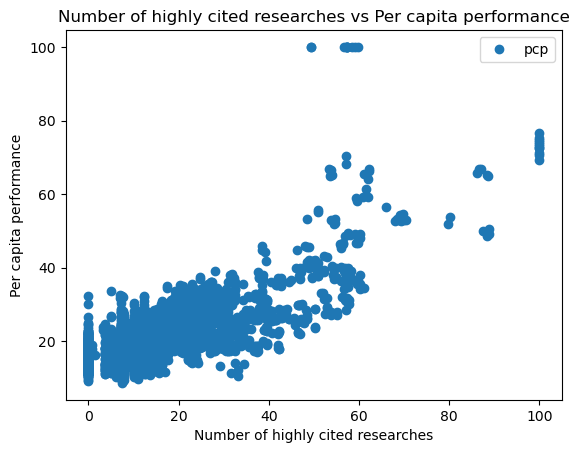

In [44]:
#Using matplotlib to create a sccatterplot for the pcp and hici variables 
ARWU.plot(x='hici',y='pcp',style='o')
plt.title('Number of highly cited researches vs Per capita performance')
plt.xlabel('Number of highly cited researches')
plt.ylabel('Per capita performance')
plt.show()

### Prepare the independent and dependent variables

In [45]:
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_sub['hici'].values.reshape(-1,1)

#y = dependent 
y = ARWU_sub['pcp'].values.reshape(-1,1)

In [46]:
X

array([[100. ],
       [100. ],
       [100. ],
       ...,
       [  3.6],
       [  7.2],
       [  0. ]])

In [47]:
y

array([[72.4],
       [73.6],
       [73. ],
       ...,
       [15.3],
       [17.5],
       [11.3]])

### Split the data into a training set and test set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 6 Regression Analysis

In [49]:
#Create a regression object 
regression = LinearRegression()

In [50]:
#fit the model to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [51]:
#Create a prediction for y
y_predicted = regression.predict(X_test)

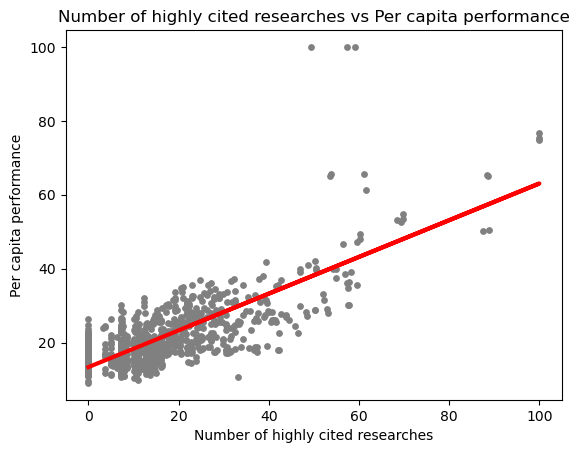

In [52]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of highly cited researches vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of highly cited researches')
plot_test.show()

Majority of the data appears to follow a positive linear trend, with the exception of a few outliers at 100 pcp and 60 hici. The data points seem to be a moderate distance from the regression line. Lastly, majority of the data is estimated to be between 0 and 40 highly cited researches and below a 40 per capita performance. 

In [53]:
#Model performance statistics
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [54]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.49670414]]
Mean squared error 39.59571355779503
R2 score 0.5663794617544469


### Interpretation of the model performance statistics 
Slope 
- Positive slope --> as the number of highly cited researches increases, so does the per capita performance 

MSE
- MSE = 39.6
- pcp variable has values between 8.7 and 100 and the hici variable has values between 0 and 100. 
- This MSE value is high considering the ranges of the values fro each variable. Since the MSE is large, this means that the distance of the data values from the regression line is also large. The regression line is not an accurate representation of the data. 

R2
- R2 = 0.566 or 57%
- 57% of the variance in the pcp values can be explained by the number of highly cited researches 

In [55]:
#Compare the predicted y values with the actual y values in the dataframe 
#Create a dataframe comparing the real and predicted values of y 
data_compare = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,14.9,13.384061
1,11.0,13.384061
2,14.6,19.642534
3,20.1,15.867582
4,12.9,13.384061
5,21.5,26.596392
6,19.7,21.033305
7,13.1,18.500114
8,36.2,26.844744
9,39.7,38.417950


The predicted values are not exactly the same as the actual values. Some are very similar, for example at indices 19, 18, 16, 11, and 4. But there are some that are extremely different such as indices 2, 3, 7, 8, and 17. 

# 5 Prepare the data for regression analysis

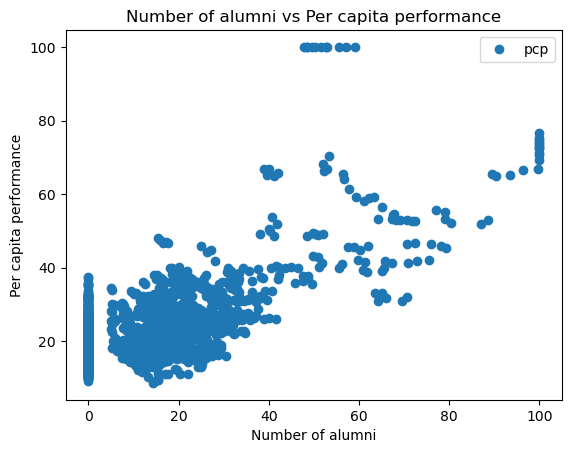

In [56]:
#Using matplotlib to create a sccatterplot for the pcp and alumni variables 
ARWU.plot(x='alumni',y='pcp',style='o')
plt.title('Number of alumni vs Per capita performance')
plt.xlabel('Number of alumni')
plt.ylabel('Per capita performance')
plt.show()

In [57]:
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_sub['alumni'].values.reshape(-1,1)

#y = dependent 
y = ARWU_sub['pcp'].values.reshape(-1,1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [59]:
#fit the model to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [60]:
#Create a prediction for y
y_predicted = regression.predict(X_test)

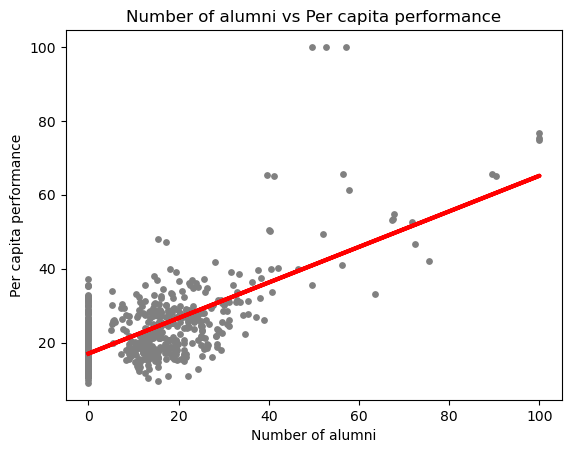

In [61]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of alumni vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of alumni')
plot_test.show()

In [62]:
#Model performance statistics
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [63]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.48098564]]
Mean squared error 46.253601033424836
R2 score 0.4934676111687267


Similar to the other two regression analyses I did (for the ns and hici variables), there is a positive slope/relationship between the pcp and alumni variables. The MSE is large, indicating that a regression line is not an accurate representation of the data. The R2 score is worse for the alumni variable than the other two variables (ns and hici). 

Based on the R2 score, the ns variable actually has a better fit and relationship with the pcp variable than the other variables explored. 

# 5 Prepare for Regression Analysis 
    PCP vs. Award variables 

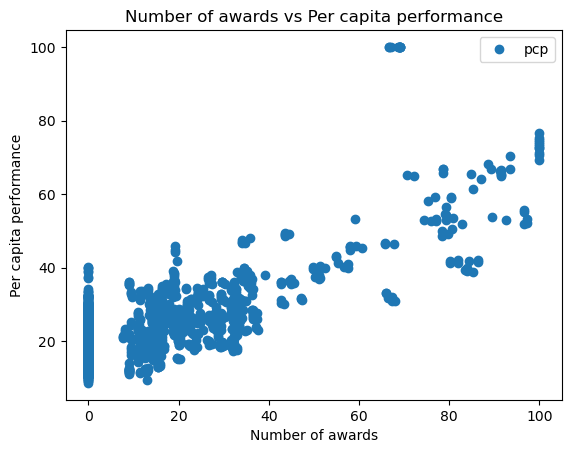

In [89]:
#Using matplotlib to create a sccatterplot for the pcp and alumni variables 
ARWU.plot(x='award',y='pcp',style='o')
plt.title('Number of awards vs Per capita performance')
plt.xlabel('Number of awards')
plt.ylabel('Per capita performance')
plt.show()

In [90]:
#Reshape the variables into NumPy arrays and place them into separate objects
#X = independent 
X = ARWU_sub['award'].values.reshape(-1,1)

#y = dependent 
y = ARWU_sub['pcp'].values.reshape(-1,1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [92]:
#fit the model to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [93]:
#Create a prediction for y
y_predicted = regression.predict(X_test)

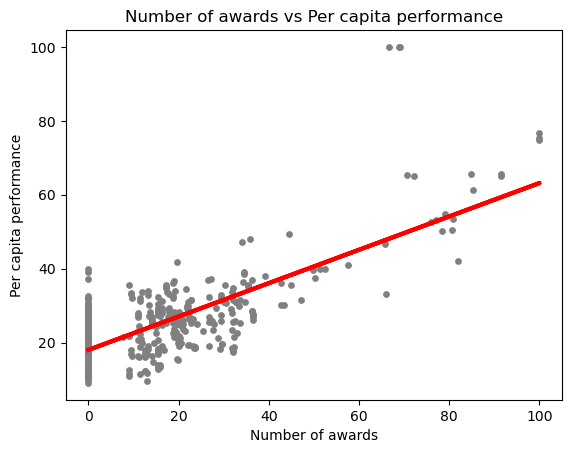

In [94]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of awards vs Per capita performance')
plot_test.ylabel('Per capita performance')
plot_test.xlabel('Number of awards')
plot_test.show()

In [95]:
#Model performance statistics
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [96]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.45131385]]
Mean squared error 38.268606081813104
R2 score 0.5809128798024641


### Interpretation of the model performance statistics
Slope (how the y variable changes when X changes)
- Positive slope of 0.45 indicates a slightly positive relationship 
- As the X increases, y will also increase 
- As the number of awards increases, the per capita performance will also increase. 

Mean squared error (how close a regression line is to a set of points - accuracy)
- MSE value of 38.27
- The pcp values have a range (min/max) of 8.7 to 100 and the award values have a range of 0 to 100.
- Based on the scale of the data, this is a large MSE value. 
- Since the MSE value is large this means that the distance of the data points from the regression line is far. Therefore the regression line is not an accurate representation of the data. 

R2 score (how well the model explains the variance in the data)
- R2 score of 0.58 (or 58%)
- The R2 score indicates that regression line is a moderate fit (closer to 1). 
- 58% of the variance in the pcp values can be explained by the number of awards. 